## Twitter scraping with [minet](https://github.com/medialab/minet)
`Notebook created by A.Pournaki for DDPS (SciencesPo/CEU 2022)`

Since the standard Twitter API only allows to retrieve of tweets from the past week, we may recur to scraping in order to collect tweets that were published earlier than this. The downside of this method is that it is a bit slower and that it does not allow us to retrieve any retweet information.

With the powerful tool [minet](https://github.com/medialab/minet), we can scrape tweets from the public API using an [advanced search query](https://help.twitter.com/en/using-twitter/twitter-advanced-search).

In [2]:
!pip install minet

Minet is best used as a command-line-utility, so we just run the command we would usually run in our terminal here:

In [3]:
!minet tw scrape --help

usage: minet twitter scrape [-h] [--rcfile RCFILE] [--include-refs] [-l LIMIT]
                            [-o OUTPUT] [--query-template QUERY_TEMPLATE]
                            [-s SELECT]
                            {tweets,users} query [file]

Minet Twitter Scrape Command

Scrape Twitter's public facing search API to collect tweets or users.

Be sure to check Twitter's advanced search to check what kind of
operators you can use to tune your queries (time range, hashtags,
mentions, boolean etc.):
https://twitter.com/search-advanced?f=live

Useful operators include "since" and "until" to search specific
time ranges like so: "since:2014-01-01 until:2017-12-31".

positional arguments:
  {tweets,users}                   What to scrape. Currently only `tweets` and `users` are possible.
  query                            Search query or name of the column containing queries to run in given CSV file.
  file                             Optional CSV file containing the queries to be run.



Let's try to scrape some tweets using an [advanced search query](https://help.twitter.com/en/using-twitter/twitter-advanced-search).

In [4]:
!minet tw scrape tweets "(from:@ZemmourEric) étrangers OR clandestins OR migrants OR immigrés OR réfugiés OR immigration OR migration OR remigration OR migratoire OR accueil" --limit 400 > tweets.csv

Searching for "(from:@ZemmourEric) étrangers OR clandestins OR migrants OR immigrés OR réfugiés OR immigration OR migration OR remigration OR migratoire OR accueil"


We can now load and inspect this dataframe with pandas

In [5]:
import pandas as pd

In [6]:
df0 = pd.read_csv("./tweets.csv")

In [7]:
print(df0.columns)

Index(['query', 'id', 'timestamp_utc', 'local_time', 'user_screen_name',
       'text', 'possibly_sensitive', 'retweet_count', 'like_count',
       'reply_count', 'lang', 'to_username', 'to_userid', 'to_tweetid',
       'source_name', 'source_url', 'user_location', 'lat', 'lng', 'user_id',
       'user_name', 'user_verified', 'user_description', 'user_url',
       'user_image', 'user_tweets', 'user_followers', 'user_friends',
       'user_likes', 'user_lists', 'user_created_at', 'user_timestamp_utc',
       'collected_via', 'match_query', 'retweeted_id', 'retweeted_user',
       'retweeted_user_id', 'retweeted_timestamp_utc', 'quoted_id',
       'quoted_user', 'quoted_user_id', 'quoted_timestamp_utc',
       'collection_time', 'url', 'place_country_code', 'place_name',
       'place_type', 'place_coordinates', 'links', 'domains', 'media_urls',
       'media_files', 'media_types', 'mentioned_names', 'mentioned_ids',
       'hashtags', 'intervention_type', 'intervention_text',
       'in

In [8]:
print(df0['text'])

0      55 % des étrangers extra-européens qui vivent ...
1      Les Français approuvent massivement mon projet...
2      Ma priorité, c’est la sécurité des Français. L...
3      66 % des Français approuvent le ministère de l...
4      Emmanuel Macron a décidé de se moquer de la so...
                             ...                        
395    Éric #Zemmour sur @CNEWS : « Depuis 40 ans, et...
396    Éric #Zemmour sur @CNEWS : « Quand Macron dit ...
397    Éric #Zemmour sur @CNews : « Les imams étrange...
398    Éric #Zemmour face à @Olivennes sur @CNEWS : «...
399    Éric #Zemmour sur @CNEWS réagit à la hausse du...
Name: text, Length: 400, dtype: object


In [ ]:
#DATA CLEANING

In [9]:
#imports
import nltk #import the natural language toolkit library
from nltk.stem.snowball import FrenchStemmer #import the French stemming library
from nltk.corpus import stopwords #import stopwords from nltk corpus
import re #import the regular expressions library; will be used to strip punctuation

In [10]:
#Remove URLS
def url_free_text(text):
    '''cleans text from urls'''
    text = re.sub(r'http\S+', '', text)
    return text

df0['url_free_tweets'] = df0['text'].apply(url_free_text)
print(df0['url_free_tweets'])

0      55 % des étrangers extra-européens qui vivent ...
1      Les Français approuvent massivement mon projet...
2      Ma priorité, c’est la sécurité des Français. L...
3      66 % des Français approuvent le ministère de l...
4      Emmanuel Macron a décidé de se moquer de la so...
                             ...                        
395    Éric #Zemmour sur @CNEWS : « Depuis 40 ans, et...
396    Éric #Zemmour sur @CNEWS : « Quand Macron dit ...
397    Éric #Zemmour sur @CNews : « Les imams étrange...
398    Éric #Zemmour face à @Olivennes sur @CNEWS : «...
399    Éric #Zemmour sur @CNEWS réagit à la hausse du...
Name: url_free_tweets, Length: 400, dtype: object


In [11]:
#Remove punctuation
def keep_only_words(text):
    '''filtering out the punctuation'''
    cleaned_text = re.sub(r'([^\w\s]|_)',' ',text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text, flags=re.U).strip()
    #no_punctuation = re.sub(r'([^\w\s]|_)','',tokens)
    #tokens = nltk.word_tokenize(no_punctuation) #generate a list of tokens from the raw text
    #text=nltk.Text(tokens,encoding)
    return cleaned_text

df0['nopunctuation'] = df0['url_free_tweets'].apply(keep_only_words)
print(df0['nopunctuation'])

0      55 des étrangers extra européens qui vivent en...
1      Les Français approuvent massivement mon projet...
2      Ma priorité c est la sécurité des Français L i...
3      66 des Français approuvent le ministère de la ...
4      Emmanuel Macron a décidé de se moquer de la so...
                             ...                        
395    Éric Zemmour sur CNEWS Depuis 40 ans et l inst...
396    Éric Zemmour sur CNEWS Quand Macron dit qu il ...
397    Éric Zemmour sur CNews Les imams étrangers ins...
398    Éric Zemmour face à Olivennes sur CNEWS On man...
399    Éric Zemmour sur CNEWS réagit à la hausse du p...
Name: nopunctuation, Length: 400, dtype: object


In [12]:
#Create a Stopwords list
stopword_list = stopwords.words('french') #create a list of all French stopwords
print(stopword_list)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [13]:
#Remove Stopwords
def filter_stopwords(tweet):
    filtered_words = [] #declare an empty list to hold our filtered words
    words_in_tweet = tweet.lower().split(' ')
    
    for word in tweet.lower().split(' '): #iterate over all words from the text
        if word not in stopword_list and word.isalpha() and len(word) > 1: #only add words that are not in the French stopwords list, are alphabetic, and are more than 1 character
            filtered_words.append(word) #add word to filter_words list if it meets the above conditions
    return ' '.join(filtered_words)

df0['nostopwords'] = df0['nopunctuation'].apply(filter_stopwords)
print(df0['nostopwords'])

0      étrangers extra européens vivent france inacti...
1      français approuvent massivement projet ministè...
2      priorité sécurité français insécurité due immi...
3      français approuvent ministère remigration déli...
4      emmanuel macron décidé moquer souffrance franç...
                             ...                        
395    éric zemmour cnews depuis ans instauration reg...
396    éric zemmour cnews quand macron dit veut expul...
397    éric zemmour cnews imams étrangers installés f...
398    éric zemmour face olivennes cnews manque actif...
399    éric zemmour cnews réagit hausse prix gazole c...
Name: nostopwords, Length: 400, dtype: object


In [14]:
EZtweets = df0['nostopwords']
print(EZtweets)

0      étrangers extra européens vivent france inacti...
1      français approuvent massivement projet ministè...
2      priorité sécurité français insécurité due immi...
3      français approuvent ministère remigration déli...
4      emmanuel macron décidé moquer souffrance franç...
                             ...                        
395    éric zemmour cnews depuis ans instauration reg...
396    éric zemmour cnews quand macron dit veut expul...
397    éric zemmour cnews imams étrangers installés f...
398    éric zemmour face olivennes cnews manque actif...
399    éric zemmour cnews réagit hausse prix gazole c...
Name: nostopwords, Length: 400, dtype: object


In [ ]:
#Word Visualisation

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [16]:
all_tweets_words = ' '.join([word for word in EZtweets.tolist()])

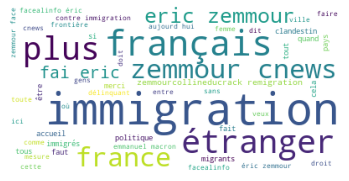

In [17]:
wordcloud = WordCloud(background_color = 'white', stopwords = stopword_list, max_words = 50).generate(all_tweets_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [65]:
#Topic Modelling

In [18]:
import textacy
import pandas as pd
from functools import partial

In [19]:
## compute the document-term-matrix
corpus = textacy.Corpus("en_core_web_sm",EZtweets)
docs_terms = (textacy.extract.terms(doc,ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"}))for doc in corpus)
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs,tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}

In [23]:
## train the topic model using non-negative matrix factorization
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=6)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)

/Users/clairemabille/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/clairemabille/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [24]:
## look at the top terms for every topic
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")

topic 0: immigration   france   arrêter   contre   toute   grand   chance   remplacement   peuple   zemmourprésident
topic 1: étranger   délinquant   allocation   prestation   argent   aide   moin   nationalité   française   non
topic 2: immigrés   droit   familial   regroupement   politique   décident   sol   migratoire   annulation   juge
topic 3: lachapellesurerdre   atteint   comment   an   san   moin   depuis   malade   médical   psychiatrie
topic 4: remigration   zemmourcollineducrack   riverain   doit   colline   tous   protéger   vivent   trafiquant   pourrissent
topic 5: éric   face   cnew   facealinfo   quand   migrant   class   védrine   dit   dire


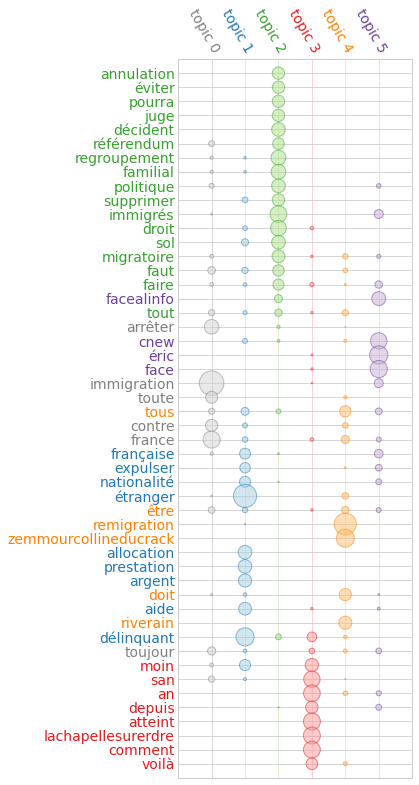

In [25]:
## visualize this information
_ = model.termite_plot(doc_term_matrix, id_to_term, n_terms=50, highlight_topics=[1,2,3,4,5])